In [37]:
from functools import cache

def attracteurs(G, fA):
    @cache
    def aux(v):
        succ = map(aux, G[v])
        if G[v] == []:
            return not fA(v)
        if fA(v):
            return any(succ)
        return all(succ)
    return filter(aux, G)

In [33]:
def attracteurs(G, fA):
    d = {}
    def aux(v):
        if v not in d:
            succ = map(aux, G[v])
            if len(G[v]) == 0:
                d[v] = not fA(v)
            elif fA(v):
                d[v] = any(succ)
            else:
                d[v] = all(succ)
        return d[v]
    return [v for v in range(len(G)) if aux(v)]

In [34]:
G = {
    0: [4, 5],
    1: [4, 5, 6],
    2: [7],
    3: [],
    4: [2],
    5: [3],
    6: [3],
    7: []
}
def fA(v):
    return v < 4

In [35]:
list(attracteurs(G, fA))

[0, 1, 2, 4, 7]

In [51]:
def nim(n):
    G = {(i, j): [] for i in range(1, n + 1) for j in ['A', 'B']}
    for i in range(1, n + 1):
        for j in ['A', 'B']:
            for k in range(i + 1, i + 4):
                if k <= n:
                    G[(i, j)].append((k, 'A' if j == 'B' else 'B'))
    return G

G = nim(9)
def fA(v):
    return v[1] == 'A'
list(attracteurs(G, fA))

[(1, 'B'),
 (2, 'A'),
 (3, 'A'),
 (4, 'A'),
 (5, 'B'),
 (6, 'A'),
 (7, 'A'),
 (8, 'A'),
 (9, 'B')]

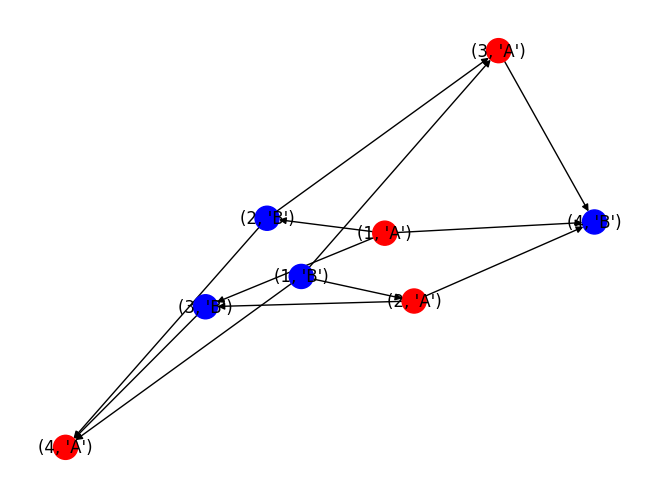

In [50]:
import networkx as nx
import matplotlib.pyplot as plt

def dessine(G, fA):
    G = nx.DiGraph(G)
    nx.draw(G, with_labels=True, node_color=['red' if fA(v) else 'blue' for v in G])
    plt.show()


dessine(G, fA)